In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
categorical = ['sex','cp','fbs','restecg','exang','slope','ca','thal','oldpeak']
numerical = ['age','trestbps','chol','thalach']

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

### Ovservation
- The dataset is imbalanced, it is expected that the model will perform poorly with class0 data

In [7]:
# Lets split the data into train and test sets

In [8]:
y = df.pop('target')
X = df

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 24)

In [10]:
# Scaling numerical features

In [11]:
scaler = MinMaxScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

In [12]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
77,0.581395,1,1,0.433962,0.216895,0,1,0.750000,1,0.0,2,0,2
109,0.372093,0,0,0.150943,0.292237,0,0,0.709677,0,0.0,2,0,2
230,0.302326,1,2,0.132075,0.267123,0,1,0.653226,0,0.0,2,0,2
226,0.651163,1,1,0.245283,0.353881,0,0,0.258065,0,1.4,1,1,3
46,0.232558,1,2,0.433962,0.248858,0,0,0.879032,0,0.0,2,0,2


In [13]:
## Training Random Forest CLassifier

In [14]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [15]:
# Evaluating performance

In [16]:
y_pred = clf.predict(X_test)

In [18]:
# classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        42
           1       0.80      0.92      0.86        49

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



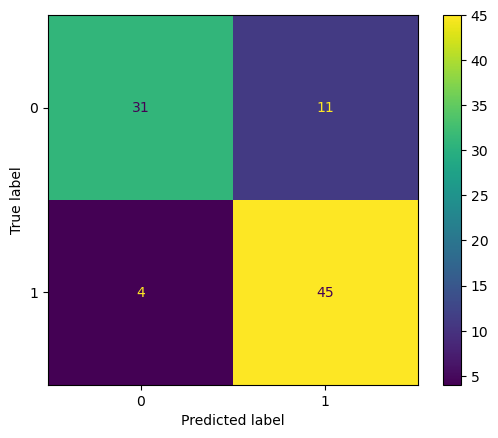

In [19]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

### observation
- The model is not performing well on the minority class 0 

## Feature importance to find top 5 features

In [24]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# print the top 5 features
print("Top 5 features:")
for i in range(5):
    print('%d. %s (%f)' % (i+ 1, X_train.columns[indices[i]], importances[indices[i]]))

Top 5 features:
1. thalach (0.158604)
2. thal (0.124930)
3. oldpeak (0.110885)
4. cp (0.102153)
5. age (0.089195)


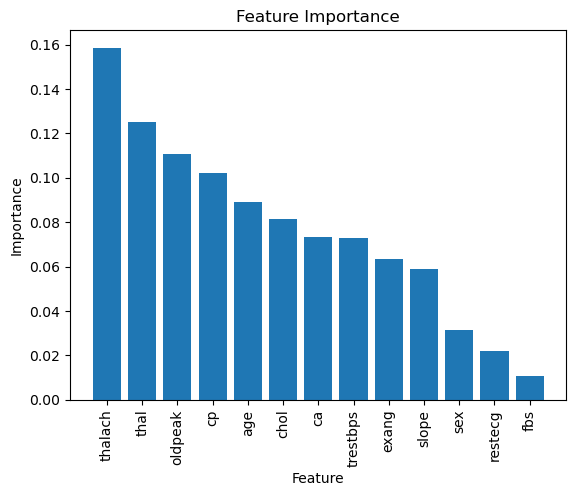

In [27]:
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [28]:
# Hyperparameter Tuning

In [29]:
param_grid = {
    'n_estimators':[50, 100, 150],
    'max_depth':[10,20,30,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [30]:
print('Best hyperparameters: ', grid_search.best_params_)
print('Best mean cross-validation score: ', grid_search.best_score_)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}
Best mean cross-validation score:  0.8491694352159467


In [31]:
## choose the two most importance features
feature1, feature2 = importance.argsort()[-2:]
print(feature1, feature2)

12 7


In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train[['thalach','oldpeak']],y_train)

RandomForestClassifier()

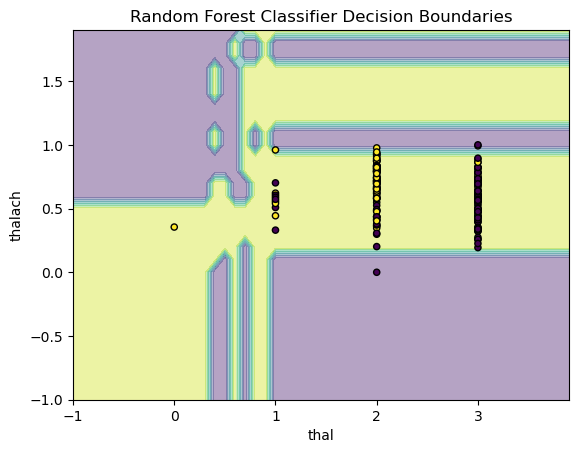

In [35]:
X_min, X_max = X_train.iloc[:, feature1].min() -1, X_train.iloc[:, feature1].max() + 1
y_min, y_max = X_train.iloc[:, feature2].min() -1, X_train.iloc[:, feature2].max() + 1
XX, yy = np.meshgrid(np.arange(X_min, X_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = rfc.predict(np.c_[XX.ravel(), yy.ravel()])
Z = Z.reshape(XX.shape)

plt.contourf(XX, yy, Z, alpha=0.4)
plt.scatter(X_train.iloc[:,feature1], X_train.iloc[:, feature2], c=y_train, s=20, edgecolor='k')
plt.xlabel(X_train.columns[feature1])
plt.ylabel(X_train.columns[feature2])
plt.title('Random Forest Classifier Decision Boundaries')
plt.show()

## Observation

- Its hard to interpret the above decision boundry plot because the model trained for this plot was only trained on two features (the best features), and the model is having a hard time finding a concrete boundry between the two classed based on only two features. Because two features are not enough to separate one class from another properly

## Insights

- There are only 303 samples in the dataset its not enough for training a more accurate and robust model.
- The dataset is imbalenced so the model will always perform bad.
- We are achieving 80 percent accuracy but like mentioned already the model is performing poorly on class 0 data.